In [1]:
import tensorflow
from tensorflow import keras
from keras.utils import np_utils

/Users/icchy/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/icchy/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
# トレーニングデータ6万枚、テストデータ1万枚
# バッチサイズ128枚

In [5]:
batch_size = 128
num_class = 10
epochs = 20

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

In [22]:
len(x_train)

60000

In [23]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
mnist = [x_train, y_train, x_test, y_test]
for m in mnist:
    print(len(m))

60000
60000
10000
10000


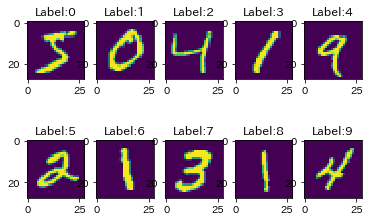

In [11]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('Label:' + str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [12]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
x_train.shape

(60000, 28, 28)

In [26]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

In [27]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s - loss: 0.2198 - acc: 0.9347     
Epoch 2/5
60000/60000 [==============================] - 8s - loss: 0.0972 - acc: 0.9698     
Epoch 3/5
60000/60000 [==============================] - 7s - loss: 0.0696 - acc: 0.9778     
Epoch 4/5
60000/60000 [==============================] - 7s - loss: 0.0539 - acc: 0.9825     
Epoch 5/5
60000/60000 [==============================] - 8s - loss: 0.0448 - acc: 0.9853     


In [29]:
model.evaluate(x_test, y_test)

 9312/10000 [==========================>...] - ETA: 0s

[0.06236378778253566, 0.9811]

In [30]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

Ans:7
Ans:2
Ans:1
Ans:0
Ans:4
Ans:1
Ans:4
Ans:9
Ans:5
Ans:9


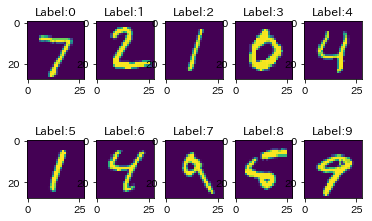

In [37]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title('Label:' + str(i))
    plt.imshow(x_test[i].reshape(28, 28), cmap=None)
    print('Ans:' + str(y_test[i]))

In [38]:
model.predict(x_test[:10])

array([[2.87209978e-10, 3.56204177e-09, 1.89553998e-06, 1.10234487e-05,
        1.79260049e-13, 1.06600984e-09, 8.83159580e-15, 9.99987125e-01,
        2.37389530e-09, 2.76172116e-08],
       [2.89026251e-11, 2.65388758e-06, 9.99997377e-01, 3.11605719e-09,
        7.93498232e-18, 2.05481864e-11, 1.41678613e-09, 3.29905209e-15,
        5.03500974e-09, 4.71645097e-16],
       [4.52380000e-09, 9.99785841e-01, 3.82047801e-05, 1.88557827e-08,
        4.05366063e-06, 1.70241918e-08, 6.35117345e-08, 7.14346315e-05,
        1.00274585e-04, 2.08739568e-08],
       [9.99951959e-01, 3.01025371e-10, 8.67044491e-06, 1.63282543e-08,
        3.28177951e-09, 3.50606257e-07, 3.79854282e-05, 8.77397554e-07,
        6.06726189e-08, 1.52949426e-07],
       [4.82285350e-06, 7.97418936e-11, 8.97505379e-06, 2.64223554e-09,
        9.82192993e-01, 5.09316408e-07, 1.33067465e-06, 1.62172910e-05,
        4.75643191e-07, 1.77746452e-02],
       [4.77150097e-10, 9.99849319e-01, 3.56559866e-07, 3.61104679e-09,
   